# Equipación del árbitro en un partido de fútbol.
---



Utilizando como dataset los colores de camiseta de los dos equipos que juegan un partido de fútbol y el color de camiseta del árbitro, en un total de 52 partidos disputados durante una Copa del Mundo.

Utilizaremos un algoritmo de árbol de decisión de clasificación para generar un modelo que realice la predicción del color de camiseta del árbitro en función de los colores de los dos equipos que juegan un partido.

Para entrenar el modelo, utilizaremos los datos de los partidos de la primera fase, que son aproximadamente un 70% de los partidos.

Para probar el modelo, utilizaremos los datos de los partidos de la fase final, que son apróximadamente el 30% restante de los partidos.

## Importar las librerías de Python

En primer lugar, se importan las librerias necesarias de Python para el tratamiento de los datos.

In [0]:
import numpy as np
import pandas as pd 

## Dataset

En el dataset tenemos como variables los valores de los colores de las camisetas del equipo local, el visitante y el árbitro.
Siendo para los equipos:
* 1 Blanco
* 2 Amarillo
* 3 Naranja
* 4 Rojo
* 5 Verde
* 6 Azúl

Y para el árbitro:
* 1 Plata
* 2 Oro
* 3 Rojo

Las observaciones son los partdos disputados:
* 0-35 Primera fase
* 36-43 Octavos de final
* 44-47 Cuartos de final
* 48-49 Semifinales
* 50 Tercer y cuarto puesto
* 51 Final


In [2]:
dataset_total = pd.read_csv('match_kits.csv')
dataset_total

,team1,team2,referee
0,1,6,2
1,2,6,1
2,2,6,3
3,2,4,1
4,2,6,3
5,2,4,1
6,2,6,3
7,1,5,2
8,2,5,1
9,1,2,3


## Validación de tipos y datos nulos en el dataset

Validamos que no tenemos ningún dato nulo en nuestro dataset y que además los datos son de tipo numérico para que el árbol de decisión entienda los datos.

In [3]:
dataset_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
team1      52 non-null int64
team2      52 non-null int64
referee    52 non-null int64
dtypes: int64(3)
memory usage: 1.3 KB


## Datos de entrenamiento

Para entrenar el modelo utilizaremos los datos de la primera fase del torneo, para ello obtenemos las 36 primeras observaciones del dataset, un 70% del dataset aproximadamente.

In [4]:
dataset_train = dataset_total.iloc[:36,:]
dataset_train

,team1,team2,referee
0,1,6,2
1,2,6,1
2,2,6,3
3,2,4,1
4,2,6,3
5,2,4,1
6,2,6,3
7,1,5,2
8,2,5,1
9,1,2,3


## Datos de prueba

Para probar el modelo utilizaremos los datos de las rondas eliminatorias, es decir de octavos de final hasta la final, para ello obtenemos las 16 últimas observaciones del dataset, un 30% del dataset aproximadamente.

In [5]:
dataset_test = dataset_total.iloc[36:,:]
dataset_test

,team1,team2,referee
36,1,4,2
37,1,4,2
38,1,2,3
39,1,2,3
40,1,3,3
41,2,4,1
42,1,5,3
43,1,5,3
44,1,6,3
45,1,6,3


## Selección de variables

Las variables de entrada del modelo serán las equipaciones de ambos equipos y la variable de salida será la equipación del árbitro.

In [6]:
x_train = dataset_train[['team1', 'team2']]
y_train = dataset_train['referee']
x_test = dataset_test[['team1', 'team2']]
y_test = dataset_test['referee']
print("Dimensión dataset x_train:", x_train.shape)
print("Dimensión dataset y_train:", y_train.shape)
print("Dimensión dataset x_test:", x_test.shape)
print("Dimensión dataset y_test:", y_test.shape)

Dimensión dataset x_train: (36, 2)
Dimensión dataset y_train: (36,)
Dimensión dataset x_test: (16, 2)
Dimensión dataset y_test: (16,)


## Generación del modelo

Utilizaremos un algoritmo de árbol de decición de clasificación ya que el valor que deseamos predecir es un valor categórico.

In [0]:
from sklearn.tree import DecisionTreeClassifier
modeloADC = DecisionTreeClassifier()

### Entrenamiento del modelo

El modelo se entrenará con el dataset de entrenamiento.

In [8]:
modeloADC.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prueba del modelo

Para probar el modelo, realizaremos la predicción de las variables de salida con los datos de entrada de prueba. 

In [0]:
y_pred = modeloADC.predict(x_test)

## Precisión del modelo

Para medir la precisión del modelo se comparan los valores reales de las variables de salida de los datos de prueba y los valores que el modelo ha realizado la predicción.

In [10]:
from sklearn.metrics import accuracy_score
print("La precisión del modelo es de", accuracy_score(y_test, y_pred)*100, "%")

La precisión del modelo es de 100.0 %


Observamos en una tabla los valores reales y de predicción del modelo, en este caso coinciden todos, por lo tanto la precisión del modelo es del 100%

In [11]:
tabla_prueba = pd.DataFrame({'Real': y_test, 'Pred.': y_pred})
tabla_prueba

,Real,Pred.
36,2,2
37,2,2
38,3,3
39,3,3
40,3,3
41,1,1
42,3,3
43,3,3
44,3,3
45,3,3


## Visualización del árbol de decisión del modelo

In [0]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "arboles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

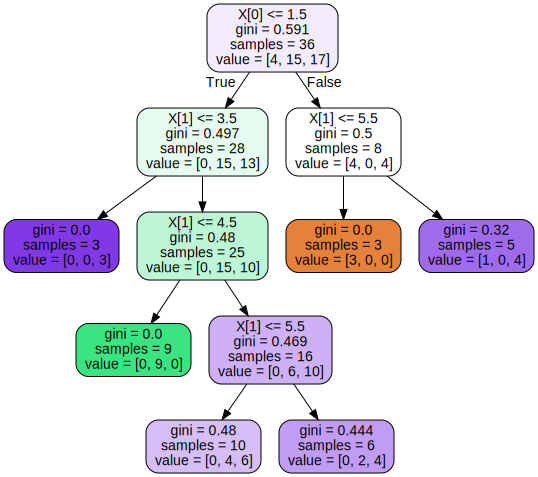

In [13]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(modeloADC, out_file=os.path.join(IMAGES_PATH, "arbol.dot"), rounded=True, filled=True)
Source.from_file(os.path.join(IMAGES_PATH, "arbol.dot"))